In [5]:
import pandas as pd

df = pd.read_csv(r"C:\Users\nasta\Downloads\surnames.csv")
df.head()

,Unnamed: 0,plural,male,female,title,male_eng,female_eng
0,0,Абаза,Абаза,Абаза,2,abaza,abaza
1,1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova
2,2,Абакумовы,Абакумов,Абакумова,3,abakumov,abakumova
3,3,Абакумовы,Абакумов,Абакумова,3,abakumov,abakumova
4,4,Абакумовы,Абакумов,Абакумова,3,abakumov,abakumova


In [6]:
len(df)

8670

Удаление дубликатов

In [7]:
df_unique = df.drop_duplicates(subset=['female_eng'])
df_cleaned = df_unique.dropna()



df_cleaned = df_cleaned.reset_index() #переиндексация
del df_cleaned['Unnamed: 0']
del df_cleaned['index']

df = df_cleaned


In [8]:
df = df.assign(male_cnt = '-', female_cnt = '-')
df

,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,-,-
1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova,-,-
2,Абамелики,Абамелики,Абамелики,5,abameliki,abameliki,-,-
3,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik,-,-
4,Абиецкие,Абиецкий,Абиецкая,1,abietsky,abietskaya,-,-
...,...,...,...,...,...,...,...,...
4288,Яцыны,Яцын,Яцына,3,jatsyn,jatsyna,-,-
4289,Яцины,Яцин,Яцина,3,jatsin,jatsina,-,-
4290,Яшев,Яшев,Яшева,3,jashev,jasheva,-,-
4291,Яшмоницкий,Яшмоницкий,Яшмоницкая,2,jashmonitsky,jashmonitskaya,-,-


Добавление нужных колонок в датафрейм.

In [9]:
df = df.assign(male_cnt = '-', female_cnt = '-')
df

,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,-,-
1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova,-,-
2,Абамелики,Абамелики,Абамелики,5,abameliki,abameliki,-,-
3,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik,-,-
4,Абиецкие,Абиецкий,Абиецкая,1,abietsky,abietskaya,-,-
...,...,...,...,...,...,...,...,...
4288,Яцыны,Яцын,Яцына,3,jatsyn,jatsyna,-,-
4289,Яцины,Яцин,Яцина,3,jatsin,jatsina,-,-
4290,Яшев,Яшев,Яшева,3,jashev,jasheva,-,-
4291,Яшмоницкий,Яшмоницкий,Яшмоницкая,2,jashmonitsky,jashmonitskaya,-,-


Сбор и обработка данных 

In [ ]:
from bs4 import BeautifulSoup
from lxml import html
from selenium import webdriver
from fake_useragent import UserAgent
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from multiprocessing.pool import ThreadPool as Pool
import requests
from selenium import webdriver
import time
from fake_useragent import UserAgent

from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from multiprocessing.pool import ThreadPool as Pool
import requests
from selenium import webdriver
import time
from fake_useragent import UserAgent

ua = UserAgent()   

def browser_start(profile):
    opts = Options()
    ua = UserAgent()  
    opts.add_argument(f"user-agent={profile}")
    opts.add_argument("--disable-extensions")
    opts.add_argument("--disable-gpu")
    opts.add_argument("--headless=new") 
    opts.page_load_strategy = "eager"
    driver = webdriver.Chrome(options=opts)
    return driver


def pasing_web(driver):
    list_of_male = df['male_eng'].tolist()
    list_of_female = df['female_eng'].tolist()
    for i in range(0, 4293):
        print(i) #логгирование
        male_name = list_of_male[i]
        url= f"https://forebears.io/ru/surnames/{male_name}"
        driver.maximize_window()
        driver.get(url)
        curr = driver.current_url
        if curr == "https://forebears.io/":
            continue
        content = driver.page_source.encode('utf-8').strip()
        bs = BeautifulSoup(content,"lxml")
        results = bs.findAll("tr", {"data-pid" : "13963"})
        if (len(results) == 0):
            df.iat[i, 6] = 0
            continue
        res = results[0].findAll("td")[1]
        count = res.getText()
        count = count.split(",")
        count = int("".join(count))
        df.iat[i, 6] = count
ua = UserAgent()
profile_1 = ua.random
profile_2 = ua.random
profile_3 = ua.random

browser1=browser_start('profile_1')
browser2=browser_start('profile_2')
browser3=browser_start('profile_3')

dataset=[browser1,browser2]
with Pool() as pool:
    result = pool.map(pasing_web,dataset)
result

In [ ]:
def pasing_web2(driver):

    list_of_female = df['female_eng'].tolist()
    for i in range(0, 4293):
        print(i)
        female_name = list_of_female[i]
        url= f"https://forebears.io/ru/surnames/{female_name}"
        driver.maximize_window()
        driver.get(url)
        curr = driver.current_url
        if curr == "https://forebears.io/":
            continue
        content = driver.page_source.encode('utf-8').strip()
        bs = BeautifulSoup(content,"lxml")
        results = bs.findAll("tr", {"data-pid" : "13963"})
        if (len(results) == 0):
            df.iat[i, 7] = 0
            continue
        res = results[0].findAll("td")[1]
        count = res.getText()
        count = count.split(",")
        count = int("".join(count))
        df.iat[i, 7] = count
ua = UserAgent()
profile_1 = ua.random
profile_2 = ua.random
profile_3 = ua.random

browser1=browser_start('profile_1')
browser2=browser_start('profile_2')
browser3=browser_start('profile_3')

dataset=[browser1,browser2]
with Pool() as pool:
    result = pool.map(pasing_web2,dataset)
result

Итоговый датафрейм:

In [11]:
df = pd.read_csv(r"surnames_itog.csv") #файл с итогами
df

,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,412,412
1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova,7187,8511
2,Абамелики,Абамелики,Абамелики,5,abameliki,abameliki,-,-
3,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik,2,2
4,Абиецкие,Абиецкий,Абиецкая,1,abietsky,abietskaya,-,-
...,...,...,...,...,...,...,...,...
4288,Яцыны,Яцын,Яцына,3,jatsyn,jatsyna,-,-
4289,Яцины,Яцин,Яцина,3,jatsin,jatsina,0,-
4290,Яшев,Яшев,Яшева,3,jashev,jasheva,1,-
4291,Яшмоницкий,Яшмоницкий,Яшмоницкая,2,jashmonitsky,jashmonitskaya,-,-


In [31]:
fem_count= df['female_cnt'].tolist()
fem_count_filtred = len([item for item in fem_count if item != 0 and item != '-'])
male_count = df['male_cnt'].tolist()
male_count_filtred = len([item for item in male_count if item != 0 and item != '-'])
summ = fem_count_filtred + male_count_filtred
summ #всего фамилий (мужских + женских), которые были найдены в России

7111

Очистка данных от "-"

In [46]:
fem_sur = df['female_eng'].tolist()
male_sur = df['male_eng'].tolist()
surname = male_sur + fem_sur
count = male_count + fem_count
df



,plural,male,female,title,male_eng,female_eng,male_cnt,female_cnt
0,Абаза,Абаза,Абаза,2,abaza,abaza,412,412
1,Абакумовы,Абакумов,Абакумова,1,abakumov,abakumova,7187,8511
2,Абамелики,Абамелики,Абамелики,5,abameliki,abameliki,-,-
3,Абамелик,Абамелик,Абамелик,5,abamelik,abamelik,2,2
4,Абиецкие,Абиецкий,Абиецкая,1,abietsky,abietskaya,-,-
...,...,...,...,...,...,...,...,...
4288,Яцыны,Яцын,Яцына,3,jatsyn,jatsyna,-,-
4289,Яцины,Яцин,Яцина,3,jatsin,jatsina,0,-
4290,Яшев,Яшев,Яшева,3,jashev,jasheva,1,-
4291,Яшмоницкий,Яшмоницкий,Яшмоницкая,2,jashmonitsky,jashmonitskaya,-,-


In [69]:
df_new = df[["male", "female", "male_cnt", "female_cnt", "title"]].copy()
df_new = df_new.drop(df_new[(df_new['male_cnt'] == '-') | (df_new['female_cnt'] == '-')].index)
df_new = df_new.reset_index()

df_new

,index,male,female,male_cnt,female_cnt,title
0,0,Абаза,Абаза,412,412,2
1,1,Абакумов,Абакумова,7187,8511,1
2,3,Абамелик,Абамелик,2,2,5
3,5,Аблов,Аблова,177,244,6
4,6,Абрамов,Абрамова,81978,94995,2
...,...,...,...,...,...,...
3480,4277,Ярцев,Ярцева,2,3,1
3481,4279,Ярыгин,Ярыгина,1,1,2
3482,4283,Ястребов,Ястребова,2,1,3
3483,4285,Яфа,Яфа,0,0,3


In [70]:
del df_new['index']
df_new

,male,female,male_cnt,female_cnt,title
0,Абаза,Абаза,412,412,2
1,Абакумов,Абакумова,7187,8511,1
2,Абамелик,Абамелик,2,2,5
3,Аблов,Аблова,177,244,6
4,Абрамов,Абрамова,81978,94995,2
...,...,...,...,...,...
3480,Ярцев,Ярцева,2,3,1
3481,Ярыгин,Ярыгина,1,1,2
3482,Ястребов,Ястребова,2,1,3
3483,Яфа,Яфа,0,0,3


In [71]:
df_new['male_cnt'] = df_new['male_cnt'].astype(int)
df_new['female_cnt'] = df_new['female_cnt'].astype(int)

Гистограммы по мужским и женским фамилиям, где по оси X - фамилии, а по оси Y - количество фамилий в России

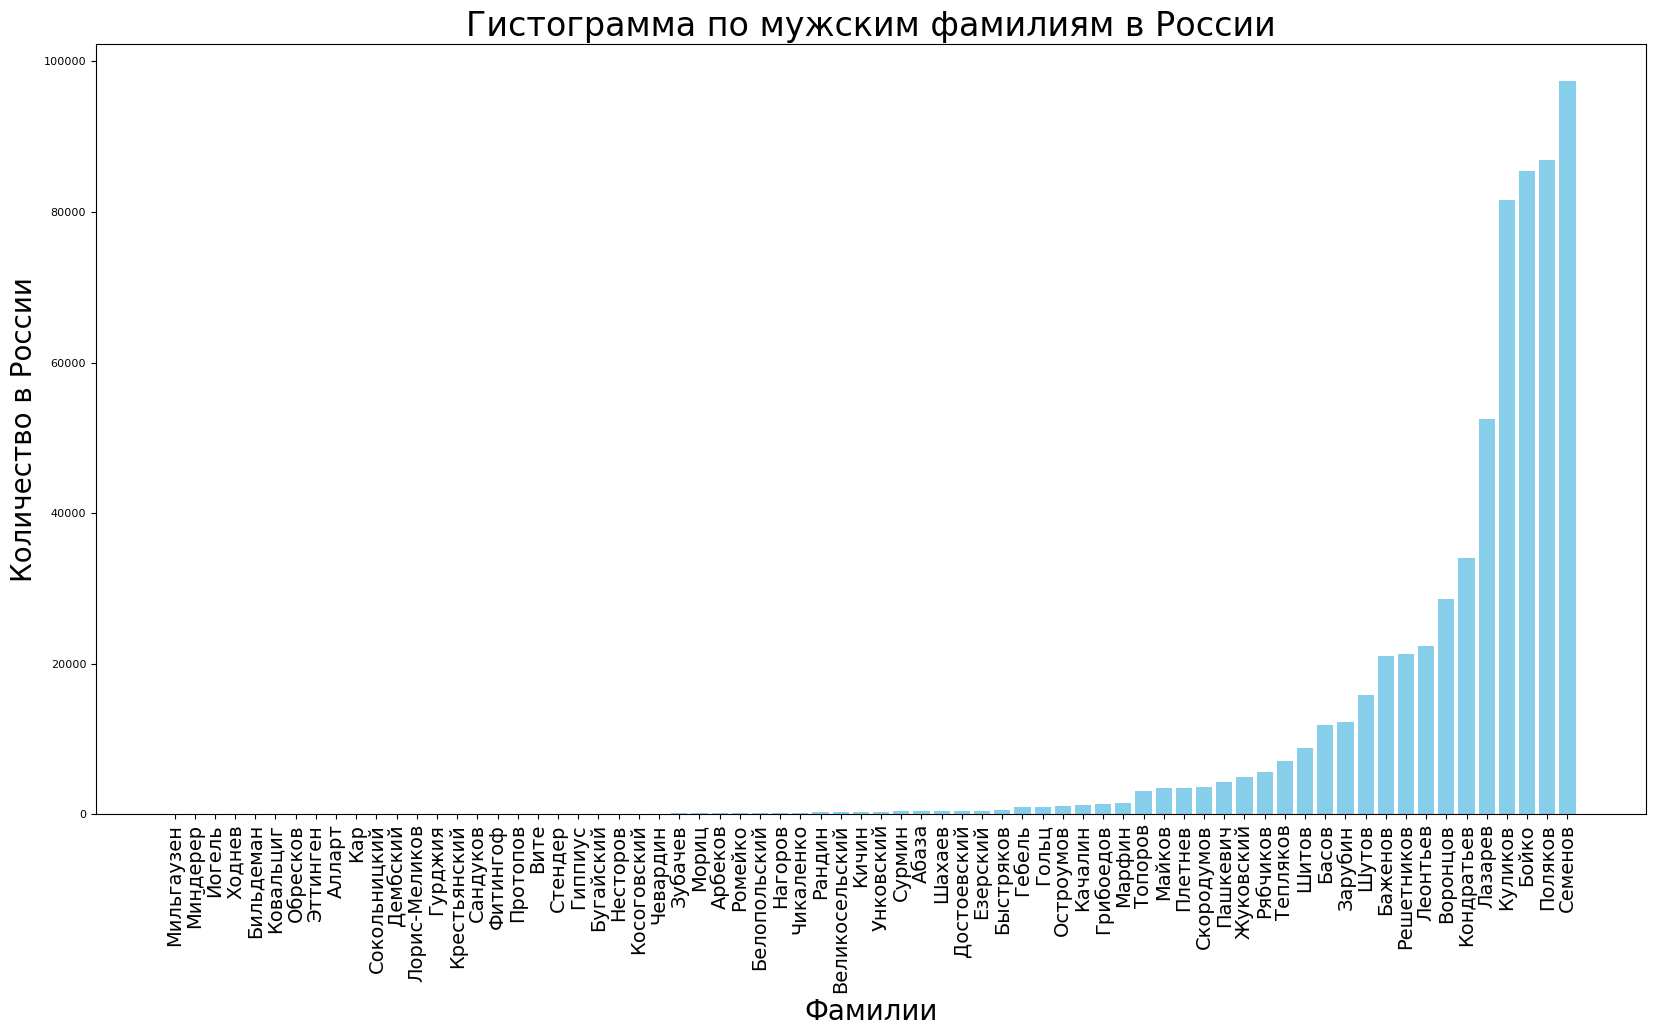

In [77]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

df_filt = df_new.iloc[::50] #для читаемости взяла каждый 50 элемент. 
df_filt = df_filt.sort_values('male_cnt')

plt.figure(figsize=(20, 10)) 
plt.bar(df_filt['male'], df_filt['male_cnt'], color='skyblue', width=0.8)

plt.xlabel('Фамилии', fontsize=20)
plt.ylabel('Количество в России', fontsize=20)
plt.title('Гистограмма по мужским фамилиям в России', fontsize=24)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=8)



plt.show()



Топ-10 самых популярных мужских фамилий в России

In [73]:
df_filt = df_filt.sort_values('male_cnt', ascending=False)

In [65]:
df_filt[['male', 'male_cnt']].head(10)

,male,male_cnt
2700,Семенов,97409
1600,Куликов,81542
600,Воронцов,28650
1700,Леонтьев,22356
2500,Решетников,21266
3400,Шутов,15836
200,Басов,11807
1100,Зарубин,12268
2300,Плетнев,3434
2600,Рябчиков,5652


Гистограмма для женских фамилий

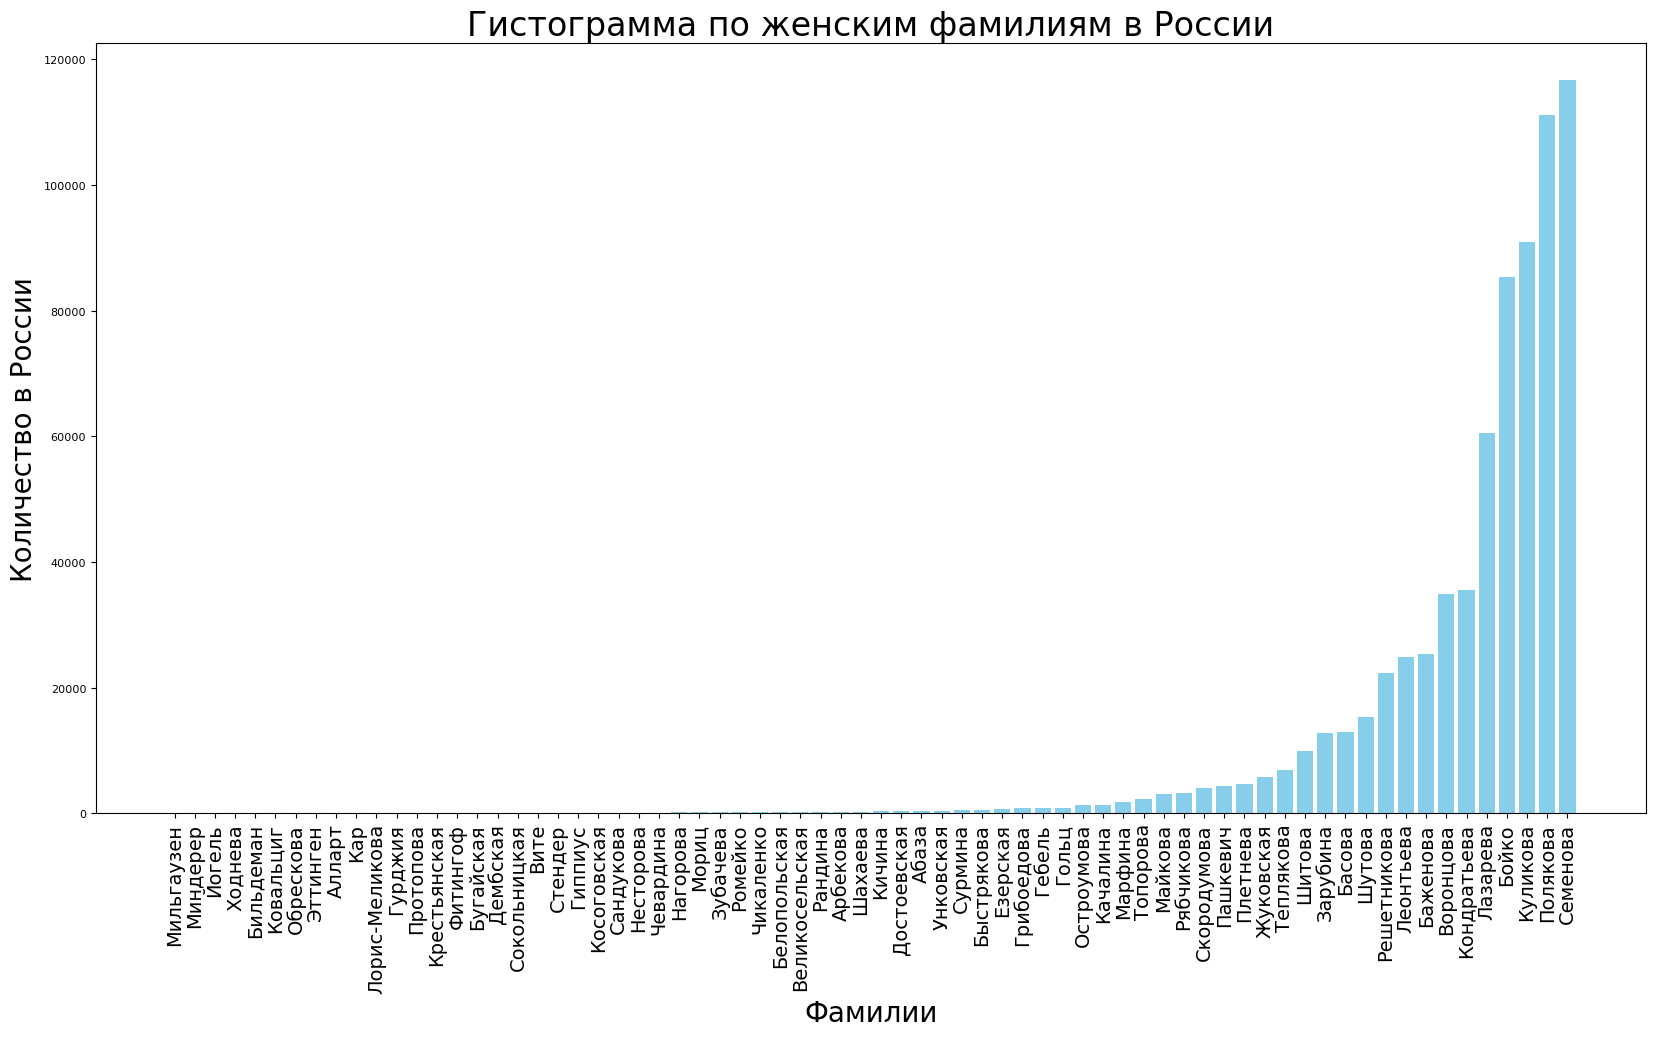

In [ ]:
df_filt = df_new.iloc[::50] #для читаемости взяла каждый 50 элемент. 
df_filt = df_filt.sort_values('female_cnt')

plt.figure(figsize=(20, 10)) 
plt.bar(df_filt['female'], df_filt['female_cnt'], color='skyblue', width=0.8)

plt.xlabel('Фамилии', fontsize=20)
plt.ylabel('Количество в России', fontsize=20)
plt.title('Гистограмма по женским фамилиям в России', fontsize=24)

plt.xticks(rotation=90, fontsize=14)
plt.yticks(fontsize=8)



plt.show()

Топ-10 самых популярных женских фамилий

In [66]:
df_filt = df_filt.sort_values('female_cnt', ascending=False)

In [67]:
df_filt[['female', 'female_cnt']].head(10)

,female,female_cnt
2700,Семенова,116710
1600,Куликова,90920
600,Воронцова,34872
1700,Леонтьева,24913
2500,Решетникова,22369
3400,Шутова,15396
200,Басова,13003
1100,Зарубина,12794
2300,Плетнева,4770
2600,Рябчикова,3199


In [14]:
df.to_csv('surnames_itog.csv', index=False)

Диаграмма рассеивания: по оси OX - количество мужчин-носителей фамилии в России, по оси OY - дореволюционный уровень дворянства

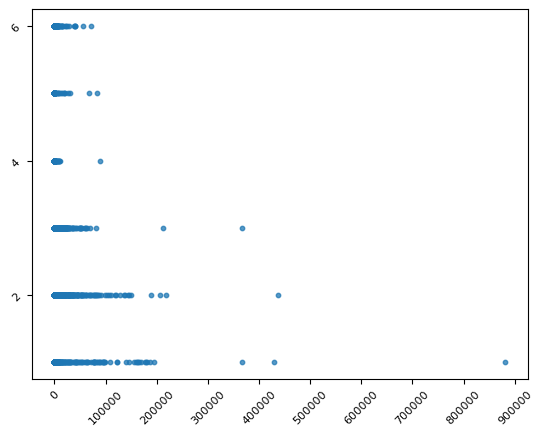

In [74]:
plt.scatter(df_new["male_cnt"],df_new["title"], s = 10, alpha = 0.75)
plt.locator_params(axis="x", nbins=15)  
plt.locator_params(axis="y", nbins=5) 
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=45, fontsize=8)

plt.show()

Диаграмма рассеивания: по оси OX - количество женщин-носительниц фамилии в России, по оси OY - дореволюционный уровень дворянства

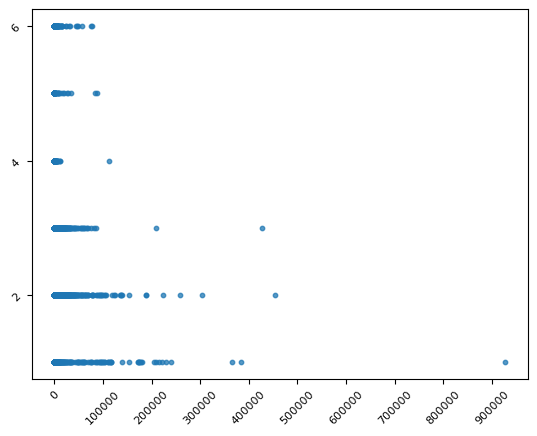

In [75]:
plt.scatter(df_new["female_cnt"],df_new["title"], s = 10, alpha = 0.75)
plt.locator_params(axis="x", nbins=15)  
plt.locator_params(axis="y", nbins=5) 
plt.xticks(rotation=45, fontsize=8)
plt.yticks(rotation=45, fontsize=8)

plt.show()

На диаграмме рассеивания не видно потенциальной корреляции между фамилией и уровнем дворянства.

In [78]:
df_new['male_cnt'].describe()

count      3485.000000
mean       6514.151220
std       27457.709978
min           0.000000
25%          20.000000
50%         253.000000
75%        2414.000000
max      881461.000000
Name: male_cnt, dtype: float64

In [79]:
df_new['female_cnt'].describe()

count      3485.000000
mean       7319.505022
std       30092.052220
min           0.000000
25%          21.000000
50%         286.000000
75%        2792.000000
max      927695.000000
Name: female_cnt, dtype: float64